# Bollinger Bands

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:bollinger_bands

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-09-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-09-04,223.666595,228.360001,229.179993,226.630005,228.410004,27390100
2018-09-05,222.207230,226.869995,229.669998,225.100006,228.990005,33333000
2018-09-06,218.514709,223.100006,227.350006,221.300003,226.229996,34290000
2018-09-07,216.751694,221.300003,225.369995,220.710007,221.850006,37619800
2018-09-10,213.842728,218.330002,221.850006,216.470001,220.949997,39516500


In [3]:
n = 20
MA = pd.Series(df['Adj Close'].rolling(n).mean())
STD = pd.Series(df['Adj Close'].rolling(n).std())
bb1 = MA + 2*STD
df['Upper Bollinger Band'] = pd.Series(bb1)
bb2 = MA - 2*STD
df['Lower Bollinger Band'] = pd.Series(bb2)

In [4]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,Upper Bollinger Band,Lower Bollinger Band
Date,,,,,,,,
2018-09-04,223.666595,228.360001,229.179993,226.630005,228.410004,27390100,NaN,NaN
2018-09-05,222.207230,226.869995,229.669998,225.100006,228.990005,33333000,NaN,NaN
2018-09-06,218.514709,223.100006,227.350006,221.300003,226.229996,34290000,NaN,NaN
2018-09-07,216.751694,221.300003,225.369995,220.710007,221.850006,37619800,NaN,NaN
2018-09-10,213.842728,218.330002,221.850006,216.470001,220.949997,39516500,NaN,NaN


<Figure size 432x288 with 0 Axes>

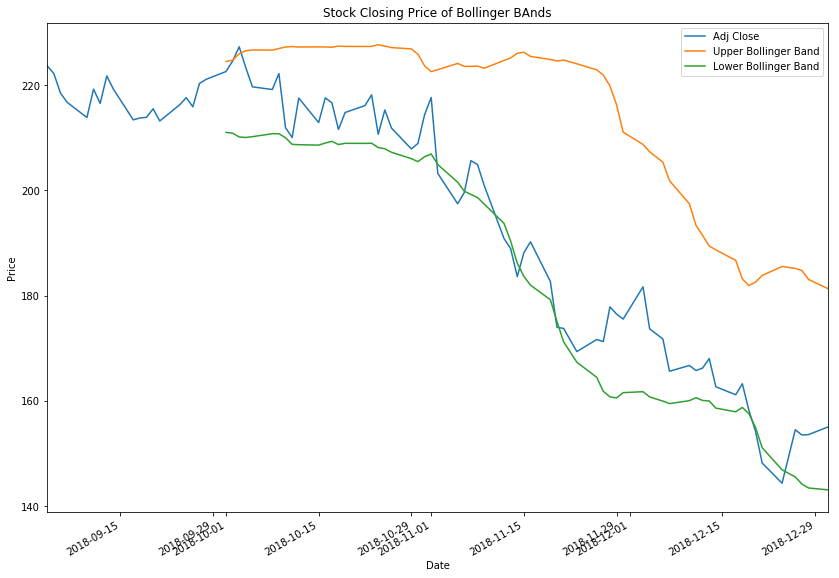

In [5]:
plt.figure()
df[['Adj Close', 'Upper Bollinger Band','Lower Bollinger Band']].plot(figsize=(14,10))
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Stock Closing Price of Bollinger BAnds')
plt.legend(loc='best')

## Candlestick with Bollinger Bands

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Upper Bollinger Band,Lower Bollinger Band,VolumePositive
0,736941.0,223.666595,228.360001,229.179993,226.630005,228.410004,27390100,NaN,NaN,False
1,736942.0,222.207230,226.869995,229.669998,225.100006,228.990005,33333000,NaN,NaN,False
2,736943.0,218.514709,223.100006,227.350006,221.300003,226.229996,34290000,NaN,NaN,False
3,736944.0,216.751694,221.300003,225.369995,220.710007,221.850006,37619800,NaN,NaN,False
4,736947.0,213.842728,218.330002,221.850006,216.470001,220.949997,39516500,NaN,NaN,False


Text(0.5, 0, 'Date')

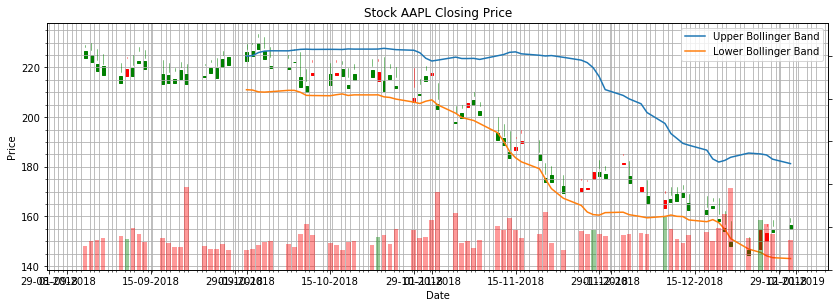

In [7]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['Upper Bollinger Band'], label='Upper Bollinger Band')
ax1.plot(df['Lower Bollinger Band'], label='Lower Bollinger Band')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.legend(loc='best')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

Text(0.5, 0, 'Date')

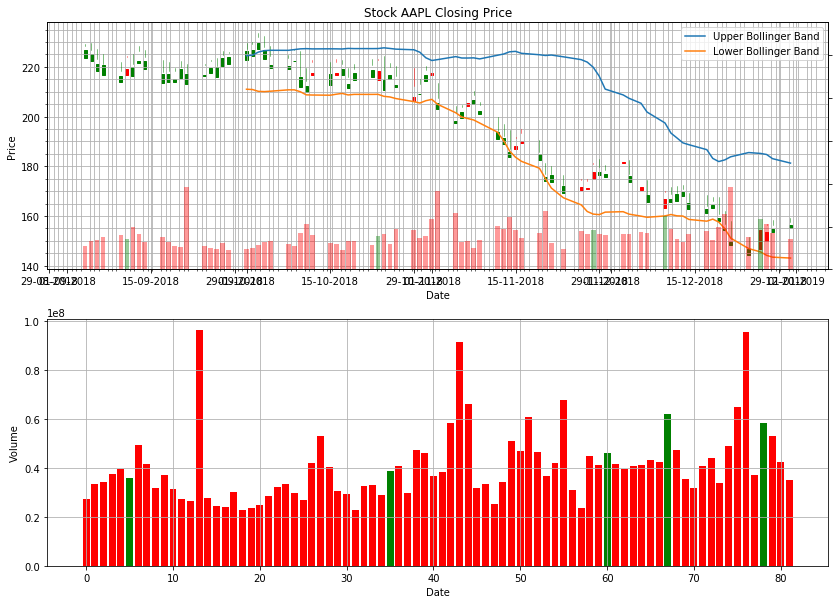

In [8]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['Upper Bollinger Band'], label='Upper Bollinger Band')
ax1.plot(df['Lower Bollinger Band'], label='Lower Bollinger Band')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.legend(loc='best')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(dfc.index, dfc['Volume'], color=dfc.VolumePositive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')